# 1- Library imports

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras 
from tensorflow.keras import layers

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization data
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.7.0


# 2 - Data

## 2.1 - Download data from Yahoo - Finance's API

In [4]:
#!pip install pydot
#pip install yfinance
import yfinance as yf

start_date, end_date = '2014-09-17', '2022-04-10'
symbols=["BTC-USD","LTC-USD","NDAQ","GC=F","CL=F","^GSPC","^VIX","^FTSE","^TNX","^CMC200","GBPUSD=X","EURUSD=X","JPY=X"]
dic_df={}


for symbol in symbols:
    msft = yf.Ticker(symbol)
    # get historical market data
    dic_df[symbol] = msft.history(interval='1d', start=start_date, end=end_date)
    dic_df[symbol].index = dic_df[symbol].index.tz_localize(None)

df=pd.concat([dic_df['BTC-USD']['Open'], dic_df['BTC-USD']['High'],dic_df['BTC-USD']['Low'],dic_df['BTC-USD']['Close'],dic_df['BTC-USD']['Volume'], dic_df['NDAQ']['Close'] ,dic_df['GC=F']['Close'] ,dic_df['CL=F']['Close'] ,dic_df['^GSPC']['Close'] ,dic_df['^VIX']['Close'] ,dic_df['^FTSE']['Close'] ,dic_df['^TNX']['Close'] , dic_df['GBPUSD=X']['Close'] ,dic_df['EURUSD=X']['Close'] ,dic_df['JPY=X']['Close']], axis=1, join="outer")
df.columns=("Open","High","Low","Close","Volume","nasdaq","gold","oil","sp500",'vix',"ftse100","tnx","gbp_usd","eur_usd","usd_jpy")


In [5]:
#Fill weekends na stock price with friday price
df.fillna(method='ffill', inplace=True)
df=df[1:]

In [6]:
df

,Open,High,Low,Close,Volume,nasdaq,gold,oil,sp500,vix,ftse100,tnx,gbp_usd,eur_usd,usd_jpy
Date,,,,,,,,,,,,,,,
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,12.687209,1225.699951,93.070000,2011.359985,12.030000,6819.299805,2.629,1.626810,1.285000,108.515999
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,12.739446,1215.300049,92.410004,2010.400024,12.110000,6837.899902,2.587,1.643709,1.292006,108.800003
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,12.739446,1215.300049,92.410004,2010.400024,12.110000,6837.899902,2.587,1.643709,1.292006,108.800003
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,12.739446,1215.300049,92.410004,2010.400024,12.110000,6837.899902,2.587,1.643709,1.292006,108.800003
2014-09-22,399.100006,406.915985,397.130005,402.152008,24127600,12.550823,1216.800049,91.519997,1994.290039,13.690000,6773.600098,2.566,1.631987,1.284142,108.940002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-05,46624.507812,47106.140625,45544.808594,45555.992188,29640604055,60.072552,1922.900024,101.959999,4525.120117,21.030001,7613.700195,2.556,1.311458,1.097586,122.808998
2022-04-06,45544.355469,45544.355469,43193.953125,43206.738281,39393395788,60.580746,1918.400024,96.230003,4481.149902,22.100000,7587.700195,2.609,1.307737,1.090643,123.655998
2022-04-07,43207.500000,43860.699219,42899.906250,43503.847656,26101973106,60.389351,1933.800049,96.029999,4500.209961,21.549999,7551.799805,2.652,1.307207,1.089823,123.723000


# 2.2 - Features description

Close- Bitcoin closing price in USD

Open- Bitcoin opening price in USD

High- Bitcoin highest price of the day in USD

Low- Bitcoin lowest price of the day in USD

Volume- Bitcoin total transactions volume of the day

Nasdak- National Association of Securities Dealers Automated Quotations closing price in USD

SP500- Standard and Poor's 500 closing price in USD. Index of 500 large listed limited liability companies traded in the United 
States

Gold- Gold closing price in USD

Oil- Oil closing price in USD

Vix- Volatility Index closing price in USD. Measure of stock market expectations of volatility based on S&P 500 index

Ftse100- Financial Times Stock Exchange 100 Index closing price in GBP. Share index of the 100 companies listed on the London 
Stock Exchange with the highest market capitalisation. 

Tnx- Treasury Yield 10 Years

Gbp_usd- British pound sterling closing price in USD

Eur_usd- Euro closing price in USD

Usd_jpy- US Dollar closing price in Japanese yen


## 2.3 - Descriptive statistics 

In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [8]:
df.describe().transpose().rename(columns={'count': 'count', 'mean':'mean', 'std':'standard deviation', 'min':'minimum', '25%':'25% percentile', '50%':'median', '75%':'75% percentil', 'max':'maximum'})

,count,mean,standard deviation,minimum,25% percentile,median,75% percentil,maximum
Open,2761.000,11856.497,16470.161,176.897,610.218,6398.850,10821.633,67549.734
High,2761.000,12171.402,16904.796,211.731,613.814,6521.990,11095.870,68789.625
Low,2761.000,11511.245,15974.802,171.510,607.938,6310.110,10528.891,66382.062
Close,2761.000,11870.148,16475.317,178.103,610.436,6404.000,10844.641,67566.828
Volume,2761.000,14930945353.196,19929519485.875,5914570.000,82357000.000,5287530000.000,25293775714.000,350967941479.000
nasdaq,2761.000,30.270,14.631,11.529,19.733,26.621,37.141,69.818
gold,2761.000,1422.310,264.808,1050.800,1223.800,1298.100,1716.600,2051.500
oil,2761.000,55.555,14.914,-37.630,46.060,53.500,63.600,123.700
sp500,2761.000,2849.349,787.638,1829.080,2139.180,2711.020,3224.010,4796.560
vix,2761.000,17.893,7.625,9.140,12.890,15.910,20.810,82.690


## 3 - Data smoothing with Savitzky–Golay filter

In [9]:
# Smooth the target variable bitcoin closing price
from scipy.signal import savgol_filter
# Savitzky-Golay filter
df['savgol'] = savgol_filter(df['Close'], 29, 9)

In [10]:
df_plot = pd.DataFrame({'Savitzky–Golay':df['savgol'], 'BTC': df['Close']})
import plotly.express as px
fig = px.line(df_plot, x=df_plot.index.values, y=df_plot.columns,
              title='custom tick labels')
fig.update_layout(title_text='Actual vs Prediction', 
                   font_size=15, font_color='black', legend_title_text='Legend')
fig.update_xaxes(title='Days')
fig.update_yaxes(title='Bitcoin closing price in USD')
fig.show()

# 4 - Feature selection

In [11]:
# Select bitcoin closing price and bitcoin closing price smoothed with Savitzky–Golay filter

In [12]:
df=df[['Close','savgol']]

# 5 - Spliting the dataset into train,  validation and test data.¶

In [13]:
# Split train data and test data
train_size = int(len(df)*0.65)
validation_size = int(len(df)*0.15)
train_dataset, validation_dataset, test_dataset = df.iloc[:train_size],df.iloc[train_size:train_size+validation_size], df.iloc[train_size+validation_size:]

Dimension of train data:  (1794, 2)
Dimension of test data:  (414, 2)
Dimension of test data:  (553, 2)


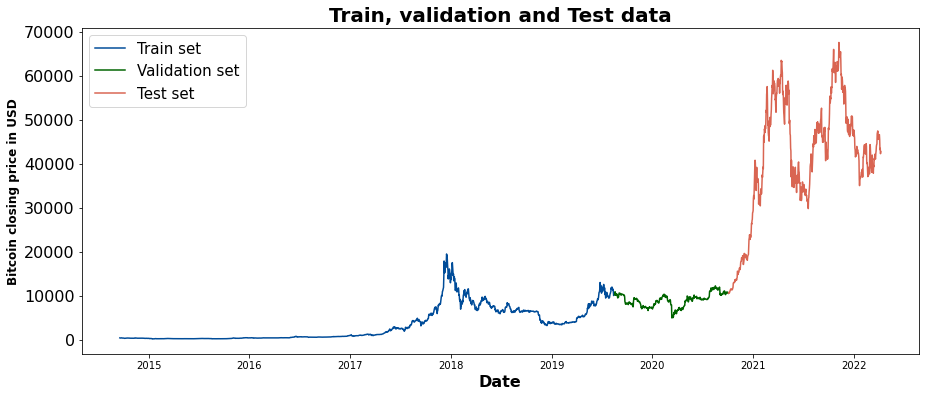

In [14]:
fig, ax = plt.subplots(figsize = (15,6))
ax.plot(train_dataset.Close,color="#004C99")
ax.plot(validation_dataset.Close,color='darkgreen')
ax.plot(test_dataset.Close,color="#D96552")
# Formatting
ax.set_title('Train, validation and Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Bitcoin closing price in USD', fontsize = 12, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.grid(b=False,axis = 'y')
ax.grid(b=False,axis = 'y')
plt.legend(['Train set','Validation set', 'Test set'], loc='upper left',prop={'size': 15})
print('Dimension of train data: ',train_dataset.shape)
print('Dimension of test data: ', validation_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

# 6 - Data Pre-processing

## 6.1 - Separating the target and dependent variables.

In [15]:
# Split train data to X and y
X_train = train_dataset.loc[:,['Close']]
y_train = train_dataset.loc[:,['savgol']]
y_train_copy = train_dataset.loc[:,['Close']]

# Split train data to X and y
X_validation = validation_dataset.loc[:,['Close']]
y_validation = validation_dataset.loc[:,['Close']]
y_validation_copy = validation_dataset.loc[:,['Close']]

# Split test data to X and y
X_test = test_dataset.loc[:,['Close']]
y_test = test_dataset.loc[:,['Close']]
y_test_copy=test_dataset.loc[:,['Close']]

In [16]:
print("X_train Dimensions:", X_train.shape)
print("y_train Dimensions:", y_train.shape)
print("X_validation Dimensions:", X_validation.shape)
print("y_validation Dimensions:", y_validation.shape)
print("X_test Dimensions:", X_test.shape)
print("y_test Dimensions:", y_test.shape)

X_train Dimensions: (1794, 1)
y_train Dimensions: (1794, 1)
X_validation Dimensions: (414, 1)
y_validation Dimensions: (414, 1)
X_test Dimensions: (553, 1)
y_test Dimensions: (553, 1)


# 6.2 - Feature Scaling - Normalization Min-Max

In [17]:
# MinMaxScaler is used to normalize the data
scaler = MinMaxScaler()

# Apply the scaler to training data
X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train)

# Apply the scaler to validation data
X_validation = scaler.fit_transform(X_validation)
y_validation = scaler.fit_transform(y_validation)

# Apply the scaler to test data
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test)

# 6.3 - Data representation for neural networks - rank-3 tensor

In [18]:
# Create a 3D input 
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)
TIME_STEPS = 16
X_test, y_test = create_dataset(X_test, y_test, TIME_STEPS)
X_val, y_val = create_dataset(X_validation, y_validation, TIME_STEPS)
X_train, y_train = create_dataset(X_train, y_train,TIME_STEPS)

print("X_train Dimensions:", X_train.shape)
print("y_train Dimensions:", y_train.shape)
print("X_val Dimensions:", X_val.shape)
print("y_val Dimensions:", y_val.shape)
print("X_test Dimensions:", X_test.shape)
print("y_test Dimensions:", y_test.shape)

X_train Dimensions: (1778, 16, 1)
y_train Dimensions: (1778, 1)
X_val Dimensions: (398, 16, 1)
y_val Dimensions: (398, 1)
X_test Dimensions: (537, 16, 1)
y_test Dimensions: (537, 1)


# 7 -Baseline Performance

### 7.1- Moving Average - 20 days

In [19]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
# Error metrics Computation

original_ytest1 = scaler.inverse_transform(y_test)
ma_20=df['Close'].rolling(20).mean().to_numpy()[(df.shape[0]-y_test.shape[0]):]

print("MAE : % f" %(mean_absolute_error(original_ytest1, ma_20)))
print("RMSE : % f" %(mean_squared_error(original_ytest1, ma_20, squared=False)))
print("MAPE : % f" %(mean_absolute_percentage_error(original_ytest1, ma_20)*100))
print("R2 : % f" %(r2_score(original_ytest1, ma_20)))

MAE :  3327.813869
RMSE :  4291.671505
MAPE :  8.142942
R2 :  0.888469


# 8 - Deep learning models

In [20]:
# # Model building and training
import keras
from keras.layers import Input, LSTM, GRU, Activation, Dense
from keras.models import Sequential, Model
from keras.callbacks import LearningRateScheduler

In [21]:
from tensorflow import keras 
from tensorflow.keras import layers

## 8.1 - LSTM model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from keras.layers import LeakyReLU

# Initialising the LSTM
model_simple_lSTM = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model_simple_lSTM.add(LSTM(units = 128, activation='sigmoid', input_shape = (X_train.shape[1], X_train.shape[2])))
model_simple_lSTM.add(Dropout(0.6))

# Adding the output layer
model_simple_lSTM.add(Dense(units = 1))

# Compiling the RNN
model_simple_lSTM.compile(optimizer = 'Adam', metrics=["mae"], loss = 'mean_squared_error')

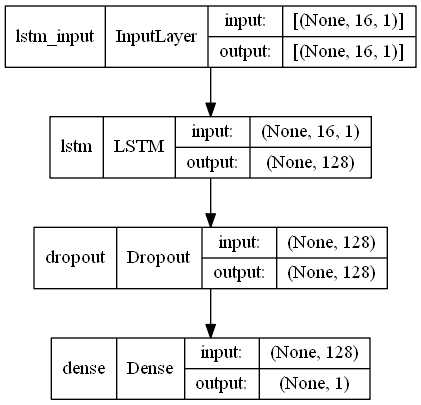

In [23]:
tf.keras.utils.plot_model(
    model_simple_lSTM,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [24]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


#early_stop and ModelCheckpoint
callbacks  = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 30, mode='min', min_delta=0),
              keras.callbacks.ModelCheckpoint("model_simple_lSTM.keras", monitor='val_loss', save_best_only=True, mode='min')]

In [25]:
history_simple_lSTM = model_simple_lSTM.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), batch_size=32, 
                             callbacks = [callbacks])

Epoch 1/200
56/56 [==============================] - 1s 8ms/step - loss: 0.2664 - mae: 0.4087 - val_loss: 0.1081 - val_mae: 0.2810
Epoch 2/200
56/56 [==============================] - 0s 5ms/step - loss: 0.1374 - mae: 0.2946 - val_loss: 0.1633 - val_mae: 0.3649
Epoch 3/200
56/56 [==============================] - 0s 5ms/step - loss: 0.0863 - mae: 0.2307 - val_loss: 0.1749 - val_mae: 0.3814
Epoch 4/200
56/56 [==============================] - 0s 5ms/step - loss: 0.0666 - mae: 0.2048 - val_loss: 0.1547 - val_mae: 0.3555
Epoch 5/200
56/56 [==============================] - 0s 5ms/step - loss: 0.0555 - mae: 0.1864 - val_loss: 0.1201 - val_mae: 0.3055
Epoch 6/200
56/56 [==============================] - 0s 5ms/step - loss: 0.0465 - mae: 0.1735 - val_loss: 0.1338 - val_mae: 0.3265
Epoch 7/200
56/56 [==============================] - 0s 5ms/step - loss: 0.0427 - mae: 0.1640 - val_loss: 0.1337 - val_mae: 0.3273
Epoch 8/200
56/56 [==============================] - 0s 5ms/step - loss: 0.0394 - m

In [26]:
model_simple_lSTM = keras.models.load_model("model_simple_lSTM.keras")

### Train/Validation loss Plot for Long Short-Term Memory

In [27]:
# Plot train loss and validation loss
def plot_loss (history):
    fig, ax = plt.subplots(figsize = (15,6))
    ax.plot(history.history['loss'],color="#004C99")
    ax.plot(history.history['val_loss'],color="#D96552")
    #ax.set_facecolor("#D3D3D3")
    plt.grid(b=False,axis = 'y')
    ax.grid(b=False,axis = 'y')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right',prop={'size': 15})

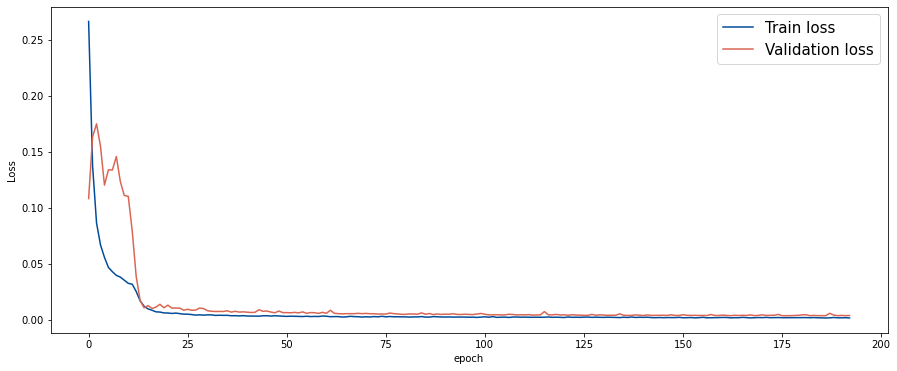

In [28]:
plot_loss (history_simple_lSTM)

## LSTM Model Validation

###  Inverse and transform the target variable
Save in a new variable, because we need y_val and y_val to train more models.

In [29]:
original_yval = scaler.inverse_transform(y_val)

### LSTM Model Predictions¶

In [30]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_val)
    prediction = scaler.inverse_transform(prediction)
    return prediction

prediction_simple_lSTM= prediction(model_simple_lSTM)

### Actual vs Prediction Plot Function

In [31]:
# Plot true future vs prediction
def plot_future(prediction, y_test):
    fig, ax = plt.subplots(figsize = (15,8))
    range_future = len(prediction)
    ax.set_title('Actual vs Prediction', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
    ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
    ax.set_ylabel('Bitcoin closing price in USD', fontsize = 14, fontdict=dict(weight='bold'))
    ax.plot(np.array(y_test),label='Actual',color="#004C99")
    ax.plot(np.array(prediction),label='Prediction',color="#D96552")
    #ax.set_facecolor("#D3D3D3")
    plt.xticks(np.arange(0,len(prediction),50),fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.grid(b=False,axis = 'y')
    ax.grid(b=False,axis = 'y')
    plt.legend(loc='upper left',prop={'size': 15})
    #plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False) 
    plt.show() 

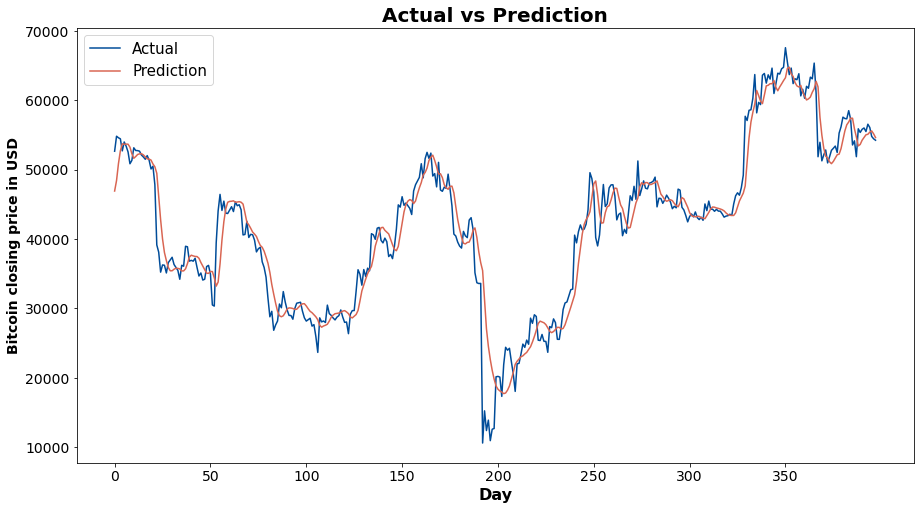

In [32]:
plot_future(prediction_simple_lSTM, original_yval)

In [33]:
df_plot = pd.DataFrame({ 'Actual': original_yval.squeeze(), 'Prediction':prediction_simple_lSTM.squeeze() })
import plotly.express as px
fig = px.line(df_plot, x=df_plot.index.values, y=df_plot.columns,
              title='custom tick labels')
fig.update_layout(title_text='Actual vs Prediction', 
                   font_size=15, font_color='black', legend_title_text='Legend')
fig.update_xaxes(title='Days')
fig.update_yaxes(title='Bitcoin closing price in USD')
fig.show()


### Evaluating the LSTM Model in validation data

In [34]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
# Error metrics Computation
print('Simple LSTM:')
print("MAE : % f" %(mean_absolute_error(original_yval, prediction_simple_lSTM)))
print("RMSE : % f" %(mean_squared_error(original_yval, prediction_simple_lSTM, squared=False)))
print("MAPE : % f" %(mean_absolute_percentage_error(original_yval, prediction_simple_lSTM)*100))
print("R2 : % f" %(r2_score(original_yval, prediction_simple_lSTM)))

Simple LSTM:
MAE :  2194.735750
RMSE :  3311.420227
MAPE :  6.953836
R2 :  0.918900


## Teste the LSTM model

###  Inverse and transform the target variable
Save in a new variable, because we need y_test and y_train to train more models.

In [35]:
original_ytest = scaler.inverse_transform(y_test)

### LSTM Model Predictions¶

In [36]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction

prediction_simple_lSTM= prediction(model_simple_lSTM)

### Actual vs Prediction Plot Function

In [37]:
# Plot true future vs prediction
def plot_future(prediction, y_test):
    fig, ax = plt.subplots(figsize = (15,8))
    range_future = len(prediction)
    ax.set_title('Actual vs Prediction', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
    ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
    ax.set_ylabel('Bitcoin closing price in USD', fontsize = 14, fontdict=dict(weight='bold'))
    ax.plot(np.array(y_test),label='Actual',color="#004C99")
    ax.plot(np.array(prediction),label='Prediction',color="#D96552")
    #ax.set_facecolor("#D3D3D3")
    plt.xticks(np.arange(0,len(prediction),50),fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.grid(b=False,axis = 'y')
    ax.grid(b=False,axis = 'y')
    plt.legend(loc='upper left',prop={'size': 15})
    #plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False) 
    plt.show() 

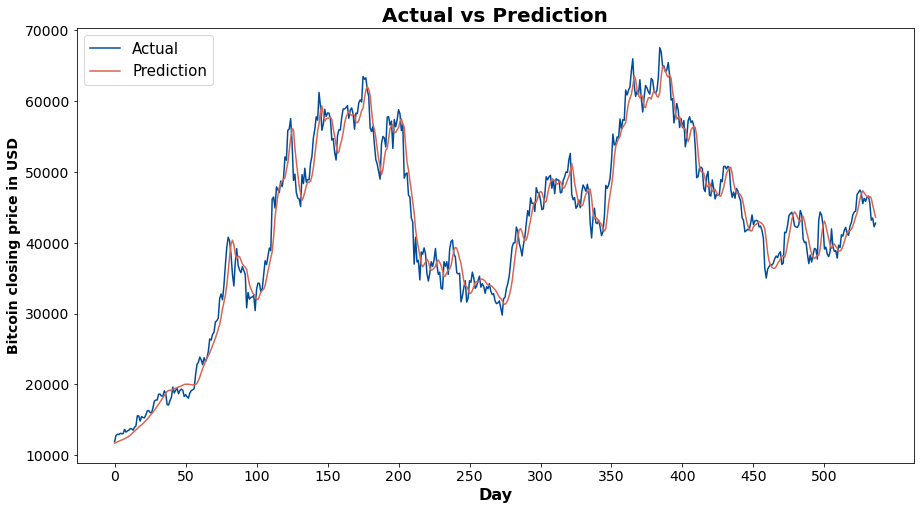

In [38]:
plot_future(prediction_simple_lSTM, original_ytest)

In [39]:
df_plot = pd.DataFrame({'Actual': original_ytest.squeeze(),'Prediction':prediction_simple_lSTM.squeeze() })
import plotly.express as px
fig = px.line(df_plot, x=df_plot.index.values, y=df_plot.columns,
              title='custom tick labels')
fig.update_layout(title_text='Actual vs Prediction', 
                   font_size=15, font_color='black', legend_title_text='Legend')
fig.update_xaxes(title='Days')
fig.update_yaxes(title='Bitcoin closing price in USD')
fig.show()


### Evaluating the LSTM Model

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
# Error metrics Computation
print('Simple LSTM:')
print("MAE : % f" %(mean_absolute_error(original_ytest, prediction_simple_lSTM)))
print("RMSE : % f" %(mean_squared_error(original_ytest, prediction_simple_lSTM, squared=False)))
print("MAPE : % f" %(mean_absolute_percentage_error(original_ytest, prediction_simple_lSTM)*100))
print("R2 : % f" %(r2_score(original_ytest, prediction_simple_lSTM)))


Simple LSTM:
MAE :  1747.878052
RMSE :  2213.463512
MAPE :  4.382328
R2 :  0.970332


In [41]:
tf.keras.backend.clear_session()

## 8.2 - BiLSTM model 

In [42]:
from keras.layers import concatenate
from keras.layers import Bidirectional
input = Input((X_train.shape[1], X_train.shape[2]))
X = layers.Bidirectional(layers.LSTM(128, activation='sigmoid'))(input)
X = layers.Dropout(0.6)(X)
X = Dense(1)(X)
model_bilstm = Model(input, X)
model_bilstm.compile(loss='mse', metrics=["mae"], optimizer='adam')

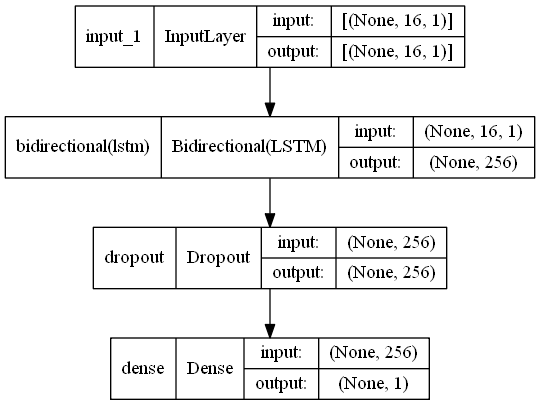

In [43]:
tf.keras.utils.plot_model(
    model_bilstm,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [44]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


#early_stop and ModelCheckpoint
callbacks  = [keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 20, mode='min', min_delta=0),
              keras.callbacks.ModelCheckpoint("BILSTM.keras", monitor='val_loss', save_best_only=True, mode='min')]

In [45]:
history_bilstm = model_bilstm.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), batch_size=32,
                             callbacks = [callbacks])

Epoch 1/200
56/56 [==============================] - 2s 9ms/step - loss: 0.3100 - mae: 0.4407 - val_loss: 0.2152 - val_mae: 0.4287
Epoch 2/200
56/56 [==============================] - 0s 6ms/step - loss: 0.1497 - mae: 0.3101 - val_loss: 0.1019 - val_mae: 0.2790
Epoch 3/200
56/56 [==============================] - 0s 6ms/step - loss: 0.0974 - mae: 0.2496 - val_loss: 0.0837 - val_mae: 0.2486
Epoch 4/200
56/56 [==============================] - 0s 5ms/step - loss: 0.0734 - mae: 0.2144 - val_loss: 0.1208 - val_mae: 0.3127
Epoch 5/200
56/56 [==============================] - 0s 5ms/step - loss: 0.0596 - mae: 0.1911 - val_loss: 0.0983 - val_mae: 0.2771
Epoch 6/200
56/56 [==============================] - 0s 5ms/step - loss: 0.0504 - mae: 0.1776 - val_loss: 0.1051 - val_mae: 0.2897
Epoch 7/200
56/56 [==============================] - 0s 6ms/step - loss: 0.0457 - mae: 0.1692 - val_loss: 0.0727 - val_mae: 0.2317
Epoch 8/200
56/56 [==============================] - 0s 5ms/step - loss: 0.0399 - m

In [46]:
model_bilstm = keras.models.load_model("BILSTM.keras")

### Train/Validation loss Plot BiLSTM

In [47]:
# Plot train loss and validation loss
def plot_loss (history):
    fig, ax = plt.subplots(figsize = (15,6))
    ax.plot(history.history['loss'],color="#004C99")
    ax.plot(history.history['val_loss'],color="#D96552")
    #ax.set_facecolor("#D3D3D3")
    plt.grid(b=False,axis = 'y')
    ax.grid(b=False,axis = 'y')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right',prop={'size': 15})

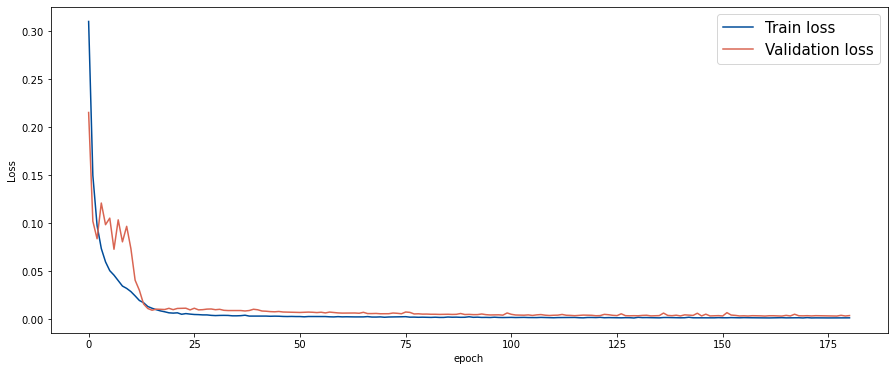

In [48]:
plot_loss (history_bilstm)

## BiLSTM Model Validation

###  Inverse and transform the target variable
Save in a new variable, because we need y_val and y_val to train more models.

In [49]:
original_yval = scaler.inverse_transform(y_val)

### BiLSTM Model Predictions¶

In [50]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_val)
    prediction = scaler.inverse_transform(prediction)
    return prediction



prediction_model_bilstm= prediction(model_bilstm)

### Actual vs Prediction Plot Function

In [51]:
# Plot true future vs prediction
def plot_future(prediction, y_test):
    fig, ax = plt.subplots(figsize = (15,8))
    range_future = len(prediction)
    ax.set_title('Actual vs Prediction', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
    ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
    ax.set_ylabel('Bitcoin closing price in USD', fontsize = 14, fontdict=dict(weight='bold'))
    ax.plot(np.array(y_test),label='Actual',color="#004C99")
    ax.plot(np.array(prediction),label='Prediction',color="#D96552")
    #ax.set_facecolor("#D3D3D3")
    plt.xticks(np.arange(0,len(prediction),50),fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.grid(b=False,axis = 'y')
    ax.grid(b=False,axis = 'y')
    plt.legend(loc='upper left',prop={'size': 15})
    #plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False) 
    plt.show() 

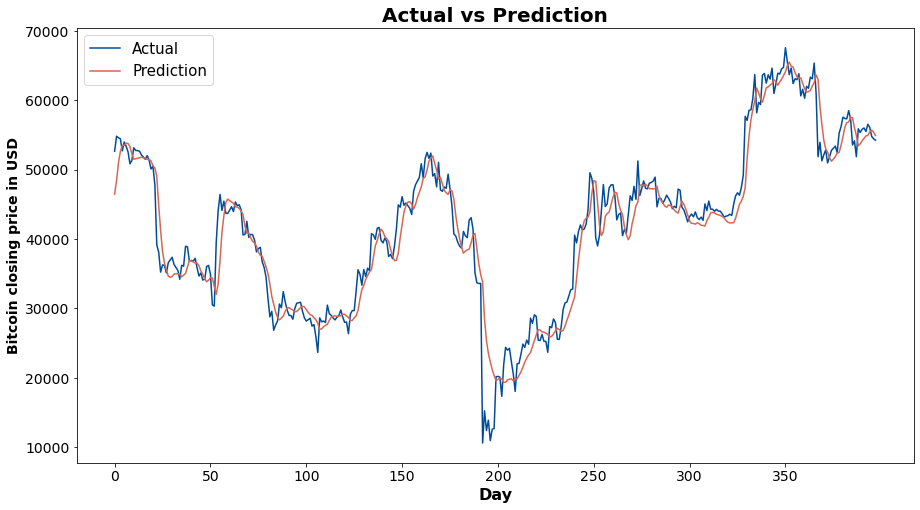

In [52]:
plot_future(prediction_model_bilstm, original_yval)

In [53]:
df_plot = pd.DataFrame({ 'Actual': original_yval.squeeze(), 'Prediction':prediction_model_bilstm.squeeze() })
import plotly.express as px
fig = px.line(df_plot, x=df_plot.index.values, y=df_plot.columns,
              title='custom tick labels')
fig.update_layout(title_text='Actual vs Prediction', 
                   font_size=15, font_color='black', legend_title_text='Legend')
fig.update_xaxes(title='Days')
fig.update_yaxes(title='Bitcoin closing price in USD')
fig.show()


### Evaluating the Model in validation data

In [54]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
# Error metrics Computation
print('Simple LSTM:')
print("MAE : % f" %(mean_absolute_error(original_yval, prediction_model_bilstm)))
print("RMSE : % f" %(mean_squared_error(original_yval, prediction_model_bilstm, squared=False)))
print("MAPE : % f" %(mean_absolute_percentage_error(original_yval, prediction_model_bilstm)*100))
print("R2 : % f" %(r2_score(original_yval, prediction_model_bilstm)))


Simple LSTM:
MAE :  2126.885131
RMSE :  3164.679074
MAPE :  6.608365
R2 :  0.925929


## Test the model

###  Inverse and transform the target variable
Save in a new variable, because we need y_test and y_train to train more models.

In [55]:
original_ytest = scaler.inverse_transform(y_test)

### BILSTM  Model  Predictions

In [56]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction



prediction_bilstm = prediction(model_bilstm)


### Actual vs Prediction Plot Function

In [57]:
# Plot true future vs prediction
def plot_future(prediction, y_test):
    fig, ax = plt.subplots(figsize = (15,8))
    range_future = len(prediction)
    ax.set_title('Actual vs Prediction', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
    ax.set_xlabel('Day', fontsize = 16, fontdict=dict(weight='bold'))
    ax.set_ylabel('Bitcoin closing price in USD', fontsize = 14, fontdict=dict(weight='bold'))
    ax.plot(np.array(y_test),label='Actual',color="#004C99")
    ax.plot(np.array(prediction),label='Prediction',color="#D96552")
    #ax.set_facecolor("#D3D3D3")
    plt.xticks(np.arange(0,len(prediction),50),fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.grid(b=False,axis = 'y')
    ax.grid(b=False,axis = 'y')
    plt.legend(loc='upper left',prop={'size': 15})
    #plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False) 
    plt.show() 

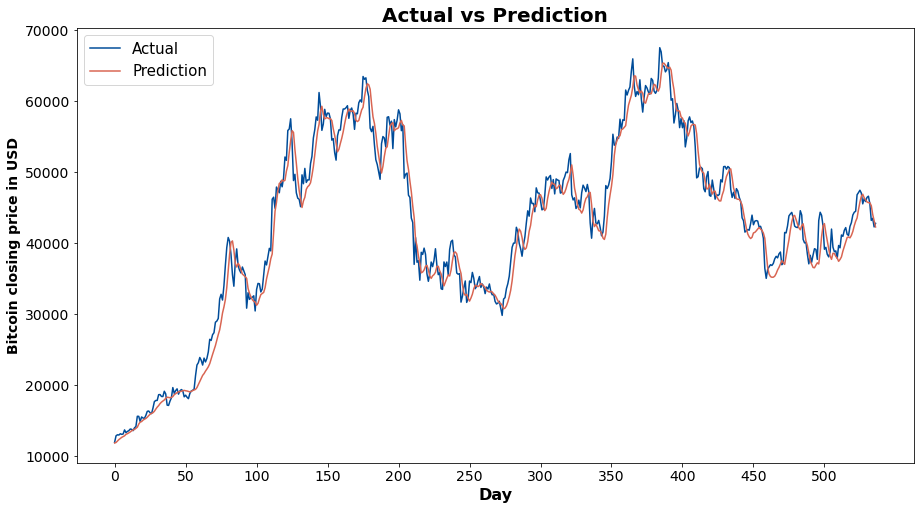

In [58]:
plot_future(prediction_bilstm, original_ytest)

In [59]:
df_plot = pd.DataFrame({ 'Actual': original_ytest.squeeze(), 'Prediction':prediction_bilstm.squeeze() })
import plotly.express as px
fig = px.line(df_plot, x=df_plot.index.values, y=df_plot.columns,
              title='custom tick labels')
fig.update_layout(title_text='Actual vs Prediction', 
                   font_size=15, font_color='black', legend_title_text='Legend')
fig.update_xaxes(title='Days')
fig.update_yaxes(title='Bitcoin closing price in USD')
fig.show()


### Evaluating the BiLSTM Model

In [60]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
# Error metrics Computation
print('BiLSTM model')
print("MAE : % f" %(mean_absolute_error(original_ytest, prediction_bilstm)))
print("RMSE : % f" %(mean_squared_error(original_ytest, prediction_bilstm, squared=False)))
print("MAPE : % f" %(mean_absolute_percentage_error(original_ytest, prediction_bilstm)*100))
print("R2 : % f" %(r2_score(original_ytest, prediction_bilstm)))



BiLSTM model
MAE :  1748.508620
RMSE :  2250.429413
MAPE :  4.250491
R2 :  0.969333


In [61]:
tf.keras.backend.clear_session()